In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
import math
import random 
import warnings
warnings.filterwarnings("ignore")

# Signature Analysis - IDs

## 1. Import data

### 1.1 Healthy crypts mutational signatures 
Lee-Six, Henry, et al. "The landscape of somatic mutation in normal colorectal epithelial cells." Nature 574.7779 (2019): 532-537.
Eleven signatures (SBS1, SBS5, SBS18, DBS2, DBS4, DBS6, DBS9, DBS11, ID1, ID2 and ID5) were found in over 85% of crypts.

In [2]:
signatures=pd.read_csv("Data/all_signatures_coloncrypts.csv", sep=',') # read signatures from cambell 2017, wuth micro=0

### 1.2 MSI CRC  signatures
Cornish, Alex J., et al. "Whole genome sequencing of 2,023 colorectal cancers reveals mutational landscapes, new driver genes and immune interactions." bioRxiv (2022): 2022-11.

In [3]:
signatures_MSI=['ID1','ID2']
vector_MSI_GEL=[0.164,0.946]
vector_MSI_GEL=np.asarray(vector_MSI_GEL)/sum(np.asarray(vector_MSI_GEL))

### 1.3  APC Genomic Context 
Import FASTA sequence (coding only) and split into regions from Genome Browswe
https://genome.ucsc.edu/cgi-bin/hgGene?hgsid=2070446478_ES8PJgBFgaCtkDStj19LqObVAiKN&hgg_do_getMrnaSeq=1&hgg_gene=ENST00000257430.9

In [4]:
# APC CDS
apc_cds='ATGGCTGCAGCTTCATATGATCAGTTGTTAAAGCAAGTTGAGGCACTGAAGATGGAGAACTCAAATCTTCGACAAGAGCTAGAAGATAATTCCAATCATCTTACAAAACTGGAAACTGAGGCATCTAATATGAAGGAAGTACTTAAACAACTACAAGGAAGTATTGAAGATGAAGCTATGGCTTCTTCTGGACAGATTGATTTATTAGAGCGTCTTAAAGAGCTTAACTTAGATAGCAGTAATTTCCCTGGAGTAAAACTGCGGTCAAAAATGTCCCTCCGTTCTTATGGAAGCCGGGAAGGATCTGTATCAAGCCGTTCTGGAGAGTGCAGTCCTGTTCCTATGGGTTCATTTCCAAGAAGAGGGTTTGTAAATGGAAGCAGAGAAAGTACTGGATATTTAGAAGAACTTGAGAAAGAGAGGTCATTGCTTCTTGCTGATCTTGACAAAGAAGAAAAGGAAAAAGACTGGTATTACGCTCAACTTCAGAATCTCACTAAAAGAATAGATAGTCTTCCTTTAACTGAAAATTTTTCCTTACAAACAGATATGACCAGAAGGCAATTGGAATATGAAGCAAGGCAAATCAGAGTTGCGATGGAAGAACAACTAGGTACCTGCCAGGATATGGAAAAACGAGCACAGCGAAGAATAGCCAGAATTCAGCAAATCGAAAAGGACATACTTCGTATACGACAGCTTTTACAGTCCCAAGCAACAGAAGCAGAGAGGTCATCTCAGAACAAGCATGAAACCGGCTCACATGATGCTGAGCGGCAGAATGAAGGTCAAGGAGTGGGAGAAATCAACATGGCAACTTCTGGTAATGGTCAGGGTTCAACTACACGAATGGACCATGAAACAGCCAGTGTTTTGAGTTCTAGTAGCACACACTCTGCACCTCGAAGGCTGACAAGTCATCTGGGAACCAAGGTGGAAATGGTGTATTCATTGTTGTCAATGCTTGGTACTCATGATAAGGATGATATGTCGCGAACTTTGCTAGCTATGTCTAGCTCCCAAGACAGCTGTATATCCATGCGACAGTCTGGATGTCTTCCTCTCCTCATCCAGCTTTTACATGGCAATGACAAAGACTCTGTATTGTTGGGAAATTCCCGGGGCAGTAAAGAGGCTCGGGCCAGGGCCAGTGCAGCACTCCACAACATCATTCACTCACAGCCTGATGACAAGAGAGGCAGGCGTGAAATCCGAGTCCTTCATCTTTTGGAACAGATACGCGCTTACTGTGAAACCTGTTGGGAGTGGCAGGAAGCTCATGAACCAGGCATGGACCAGGACAAAAATCCAATGCCAGCTCCTGTTGAACATCAGATCTGTCCTGCTGTGTGTGTTCTAATGAAACTTTCATTTGATGAAGAGCATAGACATGCAATGAATGAACTAGGGGGACTACAGGCCATTGCAGAATTATTGCAAGTGGACTGTGAAATGTATGGGCTTACTAATGACCACTACAGTATTACACTAAGACGATATGCTGGAATGGCTTTGACAAACTTGACTTTTGGAGATGTAGCCAACAAGGCTACGCTATGCTCTATGAAAGGCTGCATGAGAGCACTTGTGGCCCAACTAAAATCTGAAAGTGAAGACTTACAGCAGGTTATTGCGAGTGTTTTGAGGAATTTGTCTTGGCGAGCAGATGTAAATAGTAAAAAGACGTTGCGAGAAGTTGGAAGTGTGAAAGCATTGATGGAATGTGCTTTAGAAGTTAAAAAGGAATCAACCCTCAAAAGCGTATTGAGTGCCTTATGGAATTTGTCAGCACATTGCACTGAGAATAAAGCTGATATATGTGCTGTAGATGGTGCACTTGCATTTTTGGTTGGCACTCTTACTTACCGGAGCCAGACAAACACTTTAGCCATTATTGAAAGTGGAGGTGGGATATTACGGAATGTGTCCAGCTTGATAGCTACAAATGAGGACCACAGGCAAATCCTAAGAGAGAACAACTGTCTACAAACTTTATTACAACACTTAAAATCTCATAGTTTGACAATAGTCAGTAATGCATGTGGAACTTTGTGGAATCTCTCAGCAAGAAATCCTAAAGACCAGGAAGCATTATGGGACATGGGGGCAGTTAGCATGCTCAAGAACCTCATTCATTCAAAGCACAAAATGATTGCTATGGGAAGTGCTGCAGCTTTAAGGAATCTCATGGCAAATAGGCCTGCGAAGTACAAGGATGCCAATATTATGTCTCCTGGCTCAAGCTTGCCATCTCTTCATGTTAGGAAACAAAAAGCCCTAGAAGCAGAATTAGATGCTCAGCACTTATCAGAAACTTTTGACAATATAGACAATTTAAGTCCCAAGGCATCTCATCGTAGTAAGCAGAGACACAAGCAAAGTCTCTATGGTGATTATGTTTTTGACACCAATCGACATGATGATAATAGGTCAGACAATTTTAATACTGGCAACATGACTGTCCTTTCACCATATTTGAATACTACAGTGTTACCCAGCTCCTCTTCATCAAGAGGAAGCTTAGATAGTTCTCGTTCTGAAAAAGATAGAAGTTTGGAGAGAGAACGCGGAATTGGTCTAGGCAACTACCATCCAGCAACAGAAAATCCAGGAACTTCTTCAAAGCGAGGTTTGCAGATCTCCACCACTGCAGCCCAGATTGCCAAAGTCATGGAAGAAGTGTCAGCCATTCATACCTCTCAGGAAGACAGAAGTTCTGGGTCTACCACTGAATTACATTGTGTGACAGATGAGAGAAATGCACTTAGAAGAAGCTCTGCTGCCCATACACATTCAAACACTTACAATTTCACTAAGTCGGAAAATTCAAATAGGACATGTTCTATGCCTTATGCCAAATTAGAATACAAGAGATCTTCAAATGATAGTTTAAATAGTGTCAGTAGTAGTGATGGTTATGGTAAAAGAGGTCAAATGAAACCCTCGATTGAATCCTATTCTGAAGATGATGAAAGTAAGTTTTGCAGTTATGGTCAATACCCAGCCGACCTAGCCCATAAAATACATAGTGCAAATCATATGGATGATAATGATGGAGAACTAGATACACCAATAAATTATAGTCTTAAATATTCAGATGAGCAGTTGAACTCTGGAAGGCAAAGTCCTTCACAGAATGAAAGATGGGCAAGACCCAAACACATAATAGAAGATGAAATAAAACAAAGTGAGCAAAGACAATCAAGGAATCAAAGTACAACTTATCCTGTTTATACTGAGAGCACTGATGATAAACACCTCAAGTTCCAACCACATTTTGGACAGCAGGAATGTGTTTCTCCATACAGGTCACGGGGAGCCAATGGTTCAGAAACAAATCGAGTGGGTTCTAATCATGGAATTAATCAAAATGTAAGCCAGTCTTTGTGTCAAGAAGATGACTATGAAGATGATAAGCCTACCAATTATAGTGAACGTTACTCTGAAGAAGAACAGCATGAAGAAGAAGAGAGACCAACAAATTATAGCATAAAATATAATGAAGAGAAACGTCATGTGGATCAGCCTATTGATTATAGTTTAAAATATGCCACAGATATTCCTTCATCACAGAAACAGTCATTTTCATTCTCAAAGAGTTCATCTGGACAAAGCAGTAAAACCGAACATATGTCTTCAAGCAGTGAGAATACGTCCACACCTTCATCTAATGCCAAGAGGCAGAATCAGCTCCATCCAAGTTCTGCACAGAGTAGAAGTGGTCAGCCTCAAAAGGCTGCCACTTGCAAAGTTTCTTCTATTAACCAAGAAACAATACAGACTTATTGTGTAGAAGATACTCCAATATGTTTTTCAAGATGTAGTTCATTATCATCTTTGTCATCAGCTGAAGATGAAATAGGATGTAATCAGACGACACAGGAAGCAGATTCTGCTAATACCCTGCAAATAGCAGAAATAAAAGAAAAGATTGGAACTAGGTCAGCTGAAGATCCTGTGAGCGAAGTTCCAGCAGTGTCACAGCACCCTAGAACCAAATCCAGCAGACTGCAGGGTTCTAGTTTATCTTCAGAATCAGCCAGGCACAAAGCTGTTGAATTTTCTTCAGGAGCGAAATCTCCCTCCAAAAGTGGTGCTCAGACACCCAAAAGTCCACCTGAACACTATGTTCAGGAGACCCCACTCATGTTTAGCAGATGTACTTCTGTCAGTTCACTTGATAGTTTTGAGAGTCGTTCGATTGCCAGCTCCGTTCAGAGTGAACCATGCAGTGGAATGGTAAGTGGCATTATAAGCCCCAGTGATCTTCCAGATAGCCCTGGACAAACCATGCCACCAAGCAGAAGTAAAACACCTCCACCACCTCCTCAAACAGCTCAAACCAAGCGAGAAGTACCTAAAAATAAAGCACCTACTGCTGAAAAGAGAGAGAGTGGACCTAAGCAAGCTGCAGTAAATGCTGCAGTTCAGAGGGTCCAGGTTCTTCCAGATGCTGATACTTTATTACATTTTGCCACGGAAAGTACTCCAGATGGATTTTCTTGTTCATCCAGCCTGAGTGCTCTGAGCCTCGATGAGCCATTTATACAGAAAGATGTGGAATTAAGAATAATGCCTCCAGTTCAGGAAAATGACAATGGGAATGAAACAGAATCAGAGCAGCCTAAAGAATCAAATGAAAACCAAGAGAAAGAGGCAGAAAAAACTATTGATTCTGAAAAGGACCTATTAGATGATTCAGATGATGATGATATTGAAATACTAGAAGAATGTATTATTTCTGCCATGCCAACAAAGTCATCACGTAAAGCAAAAAAGCCAGCCCAGACTGCTTCAAAATTACCTCCACCTGTGGCAAGGAAACCAAGTCAGCTGCCTGTGTACAAACTTCTACCATCACAAAACAGGTTGCAACCCCAAAAGCATGTTAGTTTTACACCGGGGGATGATATGCCACGGGTGTATTGTGTTGAAGGGACACCTATAAACTTTTCCACAGCTACATCTCTAAGTGATCTAACAATCGAATCCCCTCCAAATGAGTTAGCTGCTGGAGAAGGAGTTAGAGGAGGGGCACAGTCAGGTGAATTTGAAAAACGAGATACCATTCCTACAGAAGGCAGAAGTACAGATGAGGCTCAAGGAGGAAAAACCTCATCTGTAACCATACCTGAATTGGATGACAATAAAGCAGAGGAAGGTGATATTCTTGCAGAATGCATTAATTCTGCTATGCCCAAAGGGAAAAGTCACAAGCCTTTCCGTGTGAAAAAGATAATGGACCAGGTCCAGCAAGCATCTGCGTCTTCTTCTGCACCCAACAAAAATCAGTTAGATGGTAAGAAAAAGAAACCAACTTCACCAGTAAAACCTATACCACAAAATACTGAATATAGGACACGTGTAAGAAAAAATGCAGACTCAAAAAATAATTTAAATGCTGAGAGAGTTTTCTCAGACAACAAAGATTCAAAGAAACAGAATTTGAAAAATAATTCCAAGGTCTTCAATGATAAGCTCCCAAATAATGAAGATAGAGTCAGAGGAAGTTTTGCTTTTGATTCACCTCATCATTACACGCCTATTGAAGGAACTCCTTACTGTTTTTCACGAAATGATTCTTTGAGTTCTCTAGATTTTGATGATGATGATGTTGACCTTTCCAGGGAAAAGGCTGAATTAAGAAAGGCAAAAGAAAATAAGGAATCAGAGGCTAAAGTTACCAGCCACACAGAACTAACCTCCAACCAACAATCAGCTAATAAGACACAAGCTATTGCAAAGCAGCCAATAAATCGAGGTCAGCCTAAACCCATACTTCAGAAACAATCCACTTTTCCCCAGTCATCCAAAGACATACCAGACAGAGGGGCAGCAACTGATGAAAAGTTACAGAATTTTGCTATTGAAAATACTCCGGTTTGCTTTTCTCATAATTCCTCTCTGAGTTCTCTCAGTGACATTGACCAAGAAAACAACAATAAAGAAAATGAACCTATCAAAGAGACTGAGCCCCCTGACTCACAGGGAGAACCAAGTAAACCTCAAGCATCAGGCTATGCTCCTAAATCATTTCATGTTGAAGATACCCCAGTTTGTTTCTCAAGAAACAGTTCTCTCAGTTCTCTTAGTATTGACTCTGAAGATGACCTGTTGCAGGAATGTATAAGCTCCGCAATGCCAAAAAAGAAAAAGCCTTCAAGACTCAAGGGTGATAATGAAAAACATAGTCCCAGAAATATGGGTGGCATATTAGGTGAAGATCTGACACTTGATTTGAAAGATATACAGAGACCAGATTCAGAACATGGTCTATCCCCTGATTCAGAAAATTTTGATTGGAAAGCTATTCAGGAAGGTGCAAATTCCATAGTAAGTAGTTTACATCAAGCTGCTGCTGCTGCATGTTTATCTAGACAAGCTTCGTCTGATTCAGATTCCATCCTTTCCCTGAAATCAGGAATCTCTCTGGGATCACCATTTCATCTTACACCTGATCAAGAAGAAAAACCCTTTACAAGTAATAAAGGCCCACGAATTCTAAAACCAGGGGAGAAAAGTACATTGGAAACTAAAAAGATAGAATCTGAAAGTAAAGGAATCAAAGGAGGAAAAAAAGTTTATAAAAGTTTGATTACTGGAAAAGTTCGATCTAATTCAGAAATTTCAGGCCAAATGAAACAGCCCCTTCAAGCAAACATGCCTTCAATCTCTCGAGGCAGGACAATGATTCATATTCCAGGAGTTCGAAATAGCTCCTCAAGTACAAGTCCTGTTTCTAAAAAAGGCCCACCCCTTAAGACTCCAGCCTCCAAAAGCCCTAGTGAAGGTCAAACAGCCACCACTTCTCCTAGAGGAGCCAAGCCATCTGTGAAATCAGAATTAAGCCCTGTTGCCAGGCAGACATCCCAAATAGGTGGGTCAAGTAAAGCACCTTCTAGATCAGGATCTAGAGATTCGACCCCTTCAAGACCTGCCCAGCAACCATTAAGTAGACCTATACAGTCTCCTGGCCGAAACTCAATTTCCCCTGGTAGAAATGGAATAAGTCCTCCTAACAAATTATCTCAACTTCCAAGGACATCATCCCCTAGTACTGCTTCAACTAAGTCCTCAGGTTCTGGAAAAATGTCATATACATCTCCAGGTAGACAGATGAGCCAACAGAACCTTACCAAACAAACAGGTTTATCCAAGAATGCCAGTAGTATTCCAAGAAGTGAGTCTGCCTCCAAAGGACTAAATCAGATGAATAATGGTAATGGAGCCAATAAAAAGGTAGAACTTTCTAGAATGTCTTCAACTAAATCAAGTGGAAGTGAATCTGATAGATCAGAAAGACCTGTATTAGTACGCCAGTCAACTTTCATCAAAGAAGCTCCAAGCCCAACCTTAAGAAGAAAATTGGAGGAATCTGCTTCATTTGAATCTCTTTCTCCATCATCTAGACCAGCTTCTCCCACTAGGTCCCAGGCACAAACTCCAGTTTTAAGTCCTTCCCTTCCTGATATGTCTCTATCCACACATTCGTCTGTTCAGGCTGGTGGATGGCGAAAACTCCCACCTAATCTCAGTCCCACTATAGAGTATAATGATGGAAGACCAGCAAAGCGCCATGATATTGCACGGTCTCATTCTGAAAGTCCTTCTAGACTTCCAATCAATAGGTCAGGAACCTGGAAACGTGAGCACAGCAAACATTCATCATCCCTTCCTCGAGTAAGCACTTGGAGAAGAACTGGAAGTTCATCTTCAATTCTTTCTGCTTCATCAGAATCCAGTGAAAAAGCAAAAAGTGAGGATGAAAAACATGTGAACTCTATTTCAGGAACCAAACAAAGTAAAGAAAACCAAGTATCCGCAAAAGGAACATGGAGAAAAATAAAAGAAAATGAATTTTCTCCCACAAATAGTACTTCTCAGACCGTTTCCTCAGGTGCTACAAATGGTGCTGAATCAAAGACTCTAATTTATCAAATGGCACCTGCTGTTTCTAAAACAGAGGATGTTTGGGTGAGAATTGAGGACTGTCCCATTAACAATCCTAGATCTGGAAGATCTCCCACAGGTAATACTCCCCCGGTGATTGACAGTGTTTCAGAAAAGGCAAATCCAAACATTAAAGATTCAAAAGATAATCAGGCAAAACAAAATGTGGGTAATGGCAGTGTTCCCATGCGTACCGTGGGTTTGGAAAATCGCCTGAACTCCTTTATTCAGGTGGATGCCCCTGACCAAAAAGGAACTGAGATAAAACCAGGACAAAATAATCCTGTCCCTGTATCAGAGACTAATGAAAGTTCTATAGTGGAACGTACCCCATTCAGTTCTAGCAGCTCAAGCAAACACAGTTCACCTAGTGGGACTGTTGCTGCCAGAGTGACTCCTTTTAATTACAACCCAAGCCCTAGGAAAAGCAGCGCAGATAGCACTTCAGCTCGGCCATCTCAGATCCCAACTCCAGTGAATAACAACACAAAGAAGCGAGATTCCAAAACTGACAGCACAGAATCCAGTGGAACCCAAAGTCCTAAGCGCCATTCTGGGTCTTACCTTGTGACATCTGTTTAA'

# Regions
R0=apc_cds[0:1256*3]
R1=apc_cds[1256*3:1370*3]
R2=apc_cds[1370*3:1486*3]
R3=apc_cds[1486*3:3*1569]
Rall=apc_cds[0:3*1569]


### 1.5  COMSIC v3 signatures
Tate, John G., et al. "COSMIC: the catalogue of somatic mutations in cancer." Nucleic acids research 47.D1 (2019): D941-D947.
Mutational Signatures (v3.4 - October 2023)

In [5]:
ids_profile=pd.read_csv("Data/COSMIC/ids.csv", sep=',')


## 2. Build exposure vectors

## C.1 Healthy

In [6]:




total=np.asarray(signatures['id.ID1'])+np.asarray(signatures['id.ID2'])+np.asarray(signatures['id.ID5'])
id1=signatures['id.ID1']/total
id1=id1.fillna(0)
id2=signatures['id.ID2']/total
id2=id2.fillna(0)
id5=signatures['id.ID5']/total
id5=id5.fillna(0)


v_indels=np.asarray([np.mean(id1),np.mean(id2),np.mean(id5)]) # find weighted exposure vector



Total=v_indels[0]*ids_profile['ID1']+v_indels[1]*ids_profile['ID2']+v_indels[2]*ids_profile['ID5']

ids=ids_profile[['Type','Where','ID1', 'ID2','ID5']]

Total[30:36]=np.zeros(6) # remove in frame
Total[54:60]=np.zeros(6) 
total_fs=Total
microhomology=Total[72:]
Total[72:83]=np.zeros(83-72) # remove microhomology

print('IDs that are frameshift', sum(total_fs))
print('Fraction of micorhomology',sum(microhomology))

ids['Total']=Total/sum(Total)



Total=ids_profile['ID1']
Total[72:83]=np.zeros(83-72) # remove microhomology
Total[30:36]=np.zeros(6) # remove in frame
Total[54:60]=np.zeros(6) 
ids['Total_ID1']=Total/sum(Total)


Total=ids_profile['ID2']
Total[72:83]=np.zeros(83-72) # remove microhomology
Total[30:36]=np.zeros(6) # remove in frame
Total[54:60]=np.zeros(6) 
ids['Total_ID2']=Total/sum(Total)


Total=ids_profile['ID5']

Total[72:83]=np.zeros(83-72) # remove microhomology
Total[30:36]=np.zeros(6) # remove in frame
Total[54:60]=np.zeros(6) 
ids['Total_ID5']=Total/sum(Total)





IDs that are frameshift 0.8805377603701875
Fraction of micorhomology 0.0


## Site-specific

In [7]:
# get exposure vector - for left only


signatures_left=signatures[signatures['site']=='Left']


total=np.asarray(signatures_left['id.ID1'])+np.asarray(signatures_left['id.ID2'])+np.asarray(signatures_left['id.ID5'])
id1=signatures_left['id.ID1']/total
id1=id1.fillna(0)
id2=signatures_left['id.ID2']/total
id2=id2.fillna(0)
id5=signatures_left['id.ID5']/total
id5=id5.fillna(0)


v_indels_L=np.asarray([np.mean(id1),np.mean(id2),np.mean(id5)]) # find weighted exposure vector



Total_L=v_indels_L[0]*ids_profile['ID1']+v_indels_L[1]*ids_profile['ID2']+v_indels_L[2]*ids_profile['ID5']

ids_L=ids_profile[['Type','Where','ID1', 'ID2','ID5']]

Total_L[30:36]=np.zeros(6) # remove in frame
Total_L[54:60]=np.zeros(6) 
total_fs=Total
microhomology=Total_L[72:]
Total_L[72:83]=np.zeros(83-72) # remove microhomology

print('IDs that are frameshift', sum(total_fs))
print('Fraction of micorhomology',sum(microhomology))

ids_L['Total']=Total_L/sum(Total_L)



Total_L=ids_profile['ID1']
Total_L[72:83]=np.zeros(83-72) # remove microhomology
Total_L[30:36]=np.zeros(6) # remove in frame
Total_L[54:60]=np.zeros(6) 
ids_L['Total_ID1']=Total/sum(Total)


Total_L=ids_profile['ID2']
Total_L[72:83]=np.zeros(83-72) # remove microhomology
Total_L[30:36]=np.zeros(6) # remove in frame
Total_L[54:60]=np.zeros(6) 
ids_L['Total_ID2']=Total_L/sum(Total_L)


Total_L=ids_profile['ID5']

Total_L[72:83]=np.zeros(83-72) # remove microhomology
Total_L[30:36]=np.zeros(6) # remove in frame
Total_L[54:60]=np.zeros(6) 
ids_L['Total_ID5']=Total_L/sum(Total_L)





IDs that are frameshift 0.8537585858774462
Fraction of micorhomology 0.0


In [8]:

signatures_Reft=signatures[signatures['site']=='Right']


total=np.asarray(signatures_Reft['id.ID1'])+np.asarray(signatures_Reft['id.ID2'])+np.asarray(signatures_Reft['id.ID5'])
id1=signatures_Reft['id.ID1']/total
id1=id1.fillna(0)
id2=signatures_Reft['id.ID2']/total
id2=id2.fillna(0)
id5=signatures_Reft['id.ID5']/total
id5=id5.fillna(0)


v_indels_R=np.asarray([np.mean(id1),np.mean(id2),np.mean(id5)]) # find weighted exposure vector



Total_R=v_indels_R[0]*ids_profile['ID1']+v_indels_R[1]*ids_profile['ID2']+v_indels_R[2]*ids_profile['ID5']

ids_R=ids_profile[['Type','Where','ID1', 'ID2','ID5']]

Total_R[30:36]=np.zeros(6) # remove in frame
Total_R[54:60]=np.zeros(6) 
total_fs=Total
microhomology=Total_R[72:]
Total_R[72:83]=np.zeros(83-72) # remove microhomology

print('IDs that are frameshift', sum(total_fs))
print('Fraction of micorhomology',sum(microhomology))

ids_R['Total']=Total_R/sum(Total_R)



Total_R=ids_profile['ID1']
Total_R[72:83]=np.zeros(83-72) # remove microhomology
Total_R[30:36]=np.zeros(6) # remove in frame
Total_R[54:60]=np.zeros(6) 
ids_R['Total_ID1']=Total/sum(Total)


Total_R=ids_profile['ID2']
Total_R[72:83]=np.zeros(83-72) # remove microhomology
Total_R[30:36]=np.zeros(6) # remove in frame
Total_R[54:60]=np.zeros(6) 
ids_R['Total_ID2']=Total_R/sum(Total_R)


Total_R=ids_profile['ID5']

Total_R[72:83]=np.zeros(83-72) # remove microhomology
Total_R[30:36]=np.zeros(6) # remove in frame
Total_R[54:60]=np.zeros(6) 
ids_R['Total_ID5']=Total_R/sum(Total_R)





IDs that are frameshift 0.8537585858774462
Fraction of micorhomology 0.0


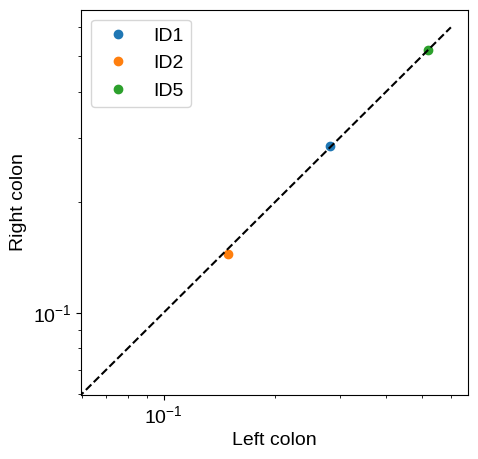

In [9]:

plt.figure(figsize=(5,5))
plt.rcParams.update({'font.size': 14})
plt.rcParams['font.family'] = 'Liberation Sans'

plt.plot(v_indels_L[0],v_indels_R[0],'o',label='ID1')
plt.plot(v_indels_L[1],v_indels_R[1],'o',label='ID2')
plt.plot(v_indels_L[2],v_indels_R[2],'o',label='ID5')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Left colon')
plt.ylabel('Right colon')

plt.plot(np.linspace(0,.6,10),np.linspace(0,.6,10),'k--')

## 3.  Assign weights to possible indels in APC 

In [10]:

# build all possible repeats of length n of 2,3,4,5 bases (n=6,5,4,3,2)

import itertools
from itertools import combinations_with_replacement





alphabets = ['A','G','C','T']
combinations=[] 
classes=[]


n=6

# of 2
for (a,b) in combinations_with_replacement(alphabets,2):
    combinations.append(n*(a+b))
    classes.append('XYXYXYXYXYXY')
# of 3
for (a,b,c) in combinations_with_replacement(alphabets, 3):
    combinations.append(n*(a+b+c))
    classes.append('XYZXYZXYZXYZXYZXYZ')
    
# of 4
for (a,b,c,d) in combinations_with_replacement(alphabets, 4):
    combinations.append(n*(a+b+c+d))
    
    classes.append('XYZWXYZWXYZWXYZWXYZWXYZW')
# of 5
for (a,b,c,d,e) in combinations_with_replacement(alphabets, 5):
    combinations.append(n*(a+b+c+d+e))
    
    classes.append('XYZWQXYZWQXYZWQXYZWQXYZWQXYZWQ')
    
    
n=5

# of 2
for (a,b) in combinations_with_replacement(alphabets,2):
    combinations.append(n*(a+b))
    classes.append('XYXYXYXYXY')
# of 3
for (a,b,c) in combinations_with_replacement(alphabets, 3):
    combinations.append(n*(a+b+c))
    classes.append('XYZXYZXYZXYZXYZ')
    
# of 4
for (a,b,c,d) in combinations_with_replacement(alphabets, 4):
    combinations.append(n*(a+b+c+d))
    
    classes.append('XYZWXYZWXYZWXYZWXYZW')
# of 5
for (a,b,c,d,e) in combinations_with_replacement(alphabets, 5):
    combinations.append(n*(a+b+c+d+e))
    
    classes.append('XYZWQXYZWQXYZWQXYZWQXYZWQ')
    
n=4

# of 2
for (a,b) in combinations_with_replacement(alphabets,2):
    combinations.append(n*(a+b))
    classes.append('XYXYXYXY')
# of 3
for (a,b,c) in combinations_with_replacement(alphabets, 3):
    combinations.append(n*(a+b+c))
    classes.append('XYZXYZXYZXYZ')
    
# of 4
for (a,b,c,d) in combinations_with_replacement(alphabets, 4):
    combinations.append(n*(a+b+c+d))
    
    classes.append('XYZWXYZWXYZWXYZW')
# of 5
for (a,b,c,d,e) in combinations_with_replacement(alphabets, 5):
    combinations.append(n*(a+b+c+d+e))
    
    classes.append('XYZWQXYZWQXYZWQXYZWQX')
           
n=3

# of 2
for (a,b) in combinations_with_replacement(alphabets,2):
    combinations.append(n*(a+b))
    classes.append('XYXYXY')
# of 3
for (a,b,c) in combinations_with_replacement(alphabets, 3):
    combinations.append(n*(a+b+c))
    classes.append('XYZXYZXYZ')
    
# of 4
for (a,b,c,d) in combinations_with_replacement(alphabets, 4):
    combinations.append(n*(a+b+c+d))
    
    classes.append('XYZWXYZWXYZW')
# of 5
for (a,b,c,d,e) in combinations_with_replacement(alphabets, 5):
    combinations.append(n*(a+b+c+d+e))
    
    classes.append('XYZWQXYZWQXYZWQ')    

    n=2

# of 2
for (a,b) in combinations_with_replacement(alphabets,2):
    combinations.append(n*(a+b))
    classes.append('XYXY')
# of 3
for (a,b,c) in combinations_with_replacement(alphabets, 3):
    combinations.append(n*(a+b+c))
    classes.append('XYZXYZ')
    
# of 4
for (a,b,c,d) in combinations_with_replacement(alphabets, 4):
    combinations.append(n*(a+b+c+d))
    
    classes.append('XYZWXYZW')
# of 5
for (a,b,c,d,e) in combinations_with_replacement(alphabets, 5):
    combinations.append(n*(a+b+c+d+e))
    
    classes.append('XYZWQXYZWQ')
    
    
    
    
# remove repeats of the same nucloetide

problems=['AAAA','CCCC','TTTT','GGGG','AAAAA','CCCCC','TTTTT','GCGGG','AAAAAA','CCCCCC','TTTTTT','GCGGGG','AAAAAAA','TTTTTTT']


types_repeats=[]
results=[]

for i in np.arange(len(combinations)):
    repeat=combinations[i]
    result = apc_cds.find(repeat)
    if result>-1:
        if result in results or repeat in problems:
            t=0
        else:
            results.append(result)
            types_repeats.append(classes[i])
            
# find long repeats of the same nucleotide

string=apc_cds
positions=[]
types=[]
for i in np.arange(len(apc_cds)):

    if string.startswith('AAAAAA', i) or string.startswith('TTTTTT', i):
        positions.append(i)
        types.append('TTTTTT')
    elif string.startswith('AAAAA', i) or string.startswith('TTTTT', i):
        positions.append(i)
        types.append('TTTTT')
    elif string.startswith('AAAA', i) or string.startswith('TTTT', i):
        positions.append(i)
        types.append('TTTT')
    elif string.startswith('AAA', i) or string.startswith('TTT', i):
        positions.append(i)
        types.append('TTT')
    elif string.startswith('AA', i) or string.startswith('TT', i):
        positions.append(i)
        types.append('TT')
    elif string.startswith('A', i) or string.startswith('T', i):
        positions.append(i)
        types.append('T')
    elif string.startswith('CCCCCC', i) or string.startswith('GGGGGG', i):
        positions.append(i)
        types.append('CCCCCC')
    elif string.startswith('CCCCC', i) or string.startswith('GGGGG', i):
        positions.append(i)
        types.append('CCCCC')
    elif string.startswith('CCCC', i) or string.startswith('GGGG', i):
        positions.append(i)
        types.append('CCCC')
    elif string.startswith('CCC', i) or string.startswith('GGG', i):
        positions.append(i)
        types.append('CCC')
    elif string.startswith('CC', i) or string.startswith('GG', i):
        positions.append(i)
        types.append('CC')
    elif string.startswith('C', i) or string.startswith('G', i):
        positions.append(i)
        types.append('C')
    else:
        positions.append(i)
        types.append('none')

    

In [11]:
types_indels = list(itertools.chain(types, types_repeats)) 
location_indels = list(itertools.chain(positions, results)) 
d = {'types': types_indels, 'location': location_indels}
indels = pd.DataFrame(data=d) # dataframe with all locations and indel types

us,sites=np.unique(types_indels,return_counts=True)
us=us.tolist()
us.append('anywhere')
sites=sites.tolist()
sites.append(len(apc_cds))
types_sites = pd.DataFrame(data={'types':us,'sites':sites}) # dataframe with all unique indel types and count in apc


unique_sites,i=np.unique(ids['Where'],return_index=True)
total=[]

total_id1=[]
total_id2=[]
total_id5=[]


for t in types_sites['types']:
    r = [i for i, x in enumerate(ids['Where']) if x == t]
    total.append((sum(ids['Total'][r])))
    total_id1.append((sum(ids['Total_ID1'][r])))
    total_id2.append((sum(ids['Total_ID2'][r])))
    total_id5.append((sum(ids['Total_ID5'][r])))

    
    

types_sites['Total']=total
types_sites['Probability']=total/np.asarray(types_sites['sites'])

types_sites['Probability_id1']=total_id1/np.asarray(types_sites['sites'])
types_sites['Probability_id2']=total_id2/np.asarray(types_sites['sites'])
types_sites['Probability_id5']=total_id5/np.asarray(types_sites['sites'])

types_sites['Probability']=total/np.asarray(types_sites['sites'])





p_site=[]
loc_site=[]
w=types_sites['types']
t=np.asarray(types_sites['sites'])
ty_site=[]
p=np.asarray(types_sites['Total'])
prob=[]
prob_id1=[]
prob_id2=[]
prob_id5=[]

pos=[]
for l in np.arange(len(indels['location'])):
    loc_site.append(indels['location'][l])
    r=[i for i, x in enumerate(types_sites['types']) if x ==indels['types'][l]][0]
    prob.append(types_sites['Probability'][r])
    
    prob_id1.append(types_sites['Probability_id1'][r])
    prob_id2.append(types_sites['Probability_id2'][r])
    prob_id5.append(types_sites['Probability_id5'][r])



    ty_site.append(indels['types'][l])
    if t[r]>0:
        p_site.append(p[r]/t[r])
    else:
        p_site.append(p[r]/t[r])
        
    
    pi=indels['location'][l]
    

    if pi in np.arange(0,1256*3):
        pos.append('R0')
    elif pi in np.arange(1256*3,1370*3):
        pos.append('R1')
    elif pi in np.arange(1370*3,1486*3):
        pos.append('R2')
    elif pi in np.arange(1486*3,1580*3):
        pos.append('R3')
    else:
        pos.append('R4')
    
    
    
locs_probs = pd.DataFrame(data={'Position':loc_site,'Class':ty_site,'Probability of indel':prob,'Norm probability':prob/sum(prob), 'Norm probability_id1':prob_id1/sum(prob_id1),'Norm probability_id2':prob_id2/sum(prob_id2),'Norm probability_id5':prob_id5/sum(prob_id5), 'Region':pos})
final=locs_probs.sort_values(by=['Position'])



# Add site-specific
final['Norm Left']=v_indels_L[0]*np.asarray(prob_id1/sum(prob_id1)) +v_indels_L[1]*np.asarray(prob_id2/sum(prob_id2))+v_indels_L[2]*np.asarray(prob_id2/sum(prob_id5))
final['Norm Right']=v_indels_R[0]*np.asarray(prob_id1/sum(prob_id1)) +v_indels_R[1]*np.asarray(prob_id2/sum(prob_id2))+v_indels_R[2]*np.asarray(prob_id2/sum(prob_id5))

# Add MSI 
final['Norm MSI']=vector_MSI_GEL[0]*np.asarray(prob_id1/sum(prob_id1)) +vector_MSI_GEL[1]*np.asarray(prob_id2/sum(prob_id2))

# Save
final.to_csv('Results/Indels_corrected.csv')


## 4. Plot individual contributions of signatures

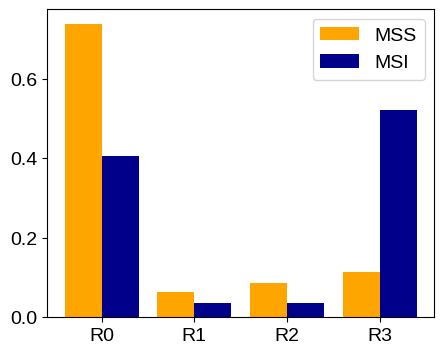

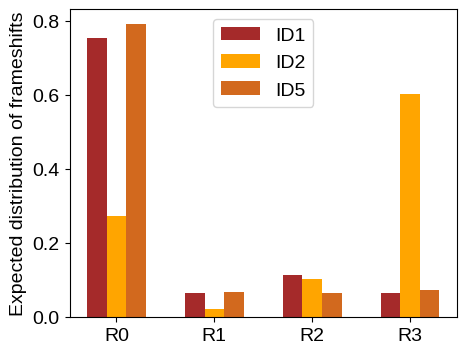

In [12]:
plt.figure(figsize=(5,4))
plt.rcParams.update({'font.size': 14})
plt.rcParams['font.family'] = 'Liberation Sans'


# Regions
R0=apc_cds[0:1256*3]
R1=apc_cds[1256*3:1370*3]
R2=apc_cds[1370*3:1486*3]
R3=apc_cds[1486*3:3*1590]
R4=apc_cds[3*1590:-1]

Rall=apc_cds[0:3*1580]
p0=sum(final['Norm probability'][final['Region']=='R0'])
p1=sum(final['Norm probability'][final['Region']=='R1'])
p2=sum(final['Norm probability'][final['Region']=='R2'])
p3=sum(final['Norm probability'][final['Region']=='R3'])
p4=sum(final['Norm probability'][final['Region']=='R4'])

I=np.asarray([p0,p1,p2,p3])
I=I/sum(I)

plt.bar(np.arange(4)-0.2, I,0.4,color='orange',label='MSS')


Signature_weights=pd.DataFrame({'Region':['R0','R1','R2','R3']})
Signature_weights['IDS_healthy']=[p0,p1,p2,p3]/sum(np.asarray([p0,p1,p2,p3]))






p0=sum(final['Norm MSI'][final['Region']=='R0'])
p1=sum(final['Norm MSI'][final['Region']=='R1'])
p2=sum(final['Norm MSI'][final['Region']=='R2'])
p3=sum(final['Norm MSI'][final['Region']=='R3'])

I=np.asarray([p0,p1,p2,p3])#,p4i])
I_MSI=I/sum(I)




plt.bar(np.arange(4)+0.2,I_MSI,0.4,color='darkblue',label='MSI')


plt.xticks(np.arange(4), ['R0','R1','R2','R3'])
plt.legend()
plt.show()
Signature_weights['IDS_MSI']=[p0,p1,p2,p3]/sum(np.asarray([p0,p1,p2,p3]))



p0i=sum(final['Norm probability_id1'][final['Region']=='R0'])
p1i=sum(final['Norm probability_id1'][final['Region']=='R1'])
p2i=sum(final['Norm probability_id1'][final['Region']=='R2'])
p3i=sum(final['Norm probability_id1'][final['Region']=='R3'])
p4i=sum(final['Norm probability_id1'][final['Region']=='R4'])

I=np.asarray([p0i,p1i,p2i,p3i])#,p4i])
I=I/sum(I)
plt.figure(figsize=(5,4))
plt.rcParams.update({'font.size': 14})
plt.rcParams['font.family'] = 'Liberation Sans'


plt.bar(np.arange(4)-0.2,[I[0],I[1],I[2],I[3]],0.2,color='brown',label='ID1')

p0i=sum(final['Norm probability_id2'][final['Region']=='R0'])
p1i=sum(final['Norm probability_id2'][final['Region']=='R1'])
p2i=sum(final['Norm probability_id2'][final['Region']=='R2'])
p3i=sum(final['Norm probability_id2'][final['Region']=='R3'])
p4i=sum(final['Norm probability_id2'][final['Region']=='R4'])

I=np.asarray([p0i,p1i,p2i,p3i])#,p4i])
I=I/sum(I)

plt.bar(np.arange(4)+0,[I[0],I[1],I[2],I[3]],0.2,color='orange',label='ID2')




p0i=sum(final['Norm probability_id5'][final['Region']=='R0'])
p1i=sum(final['Norm probability_id5'][final['Region']=='R1'])
p2i=sum(final['Norm probability_id5'][final['Region']=='R2'])
p3i=sum(final['Norm probability_id5'][final['Region']=='R3'])
p4i=sum(final['Norm probability_id2'][final['Region']=='R4'])

I=np.asarray([p0i,p1i,p2i,p3i])#,p4i])
I=I/sum(I)

plt.bar(np.arange(4)+0.2,[I[0],I[1],I[2],I[3]],0.2,color='chocolate',label='ID5')


plt.xticks(np.arange(4), ['R0','R1','R2','R3'])
plt.legend()
plt.ylabel('Expected distribution of frameshifts')

plt.savefig('Results/idper_signature.svg',dpi=300)
plt.show()


([<matplotlib.axis.XTick at 0x7ff31996d220>,
 [Text(0, 0, 'R0'), Text(1, 0, 'R1'), Text(2, 0, 'R2'), Text(3, 0, 'R3')])

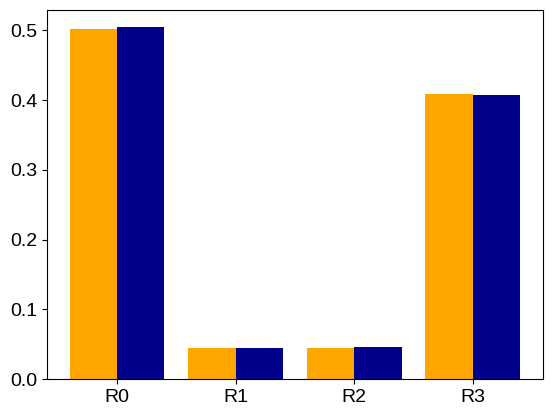

In [13]:
## Differences in distal versus proximal

p0=sum(final['Norm Left'][final['Region']=='R0'])
p1=sum(final['Norm Left'][final['Region']=='R1'])
p2=sum(final['Norm Left'][final['Region']=='R2'])
p3=sum(final['Norm Left'][final['Region']=='R3'])
p4=sum(final['Norm Left'][final['Region']=='R4'])

I=np.asarray([p0,p1,p2,p3])
I=I/sum(I)

plt.bar(np.arange(4)-0.2, I,0.4,color='orange',label='MSS')


Signature_weights['IDS_healthy_Left']=[p0,p1,p2,p3]/sum(np.asarray([p0,p1,p2,p3]))



p0=sum(final['Norm Right'][final['Region']=='R0'])
p1=sum(final['Norm Right'][final['Region']=='R1'])
p2=sum(final['Norm Right'][final['Region']=='R2'])
p3=sum(final['Norm Right'][final['Region']=='R3'])
p4=sum(final['Norm Right'][final['Region']=='R4'])

I=np.asarray([p0,p1,p2,p3])
I=I/sum(I)

plt.bar(np.arange(4)+0.2, I,0.4,color='darkblue',label='MSS')


Signature_weights['IDS_healthy_Right']=[p0,p1,p2,p3]/sum(np.asarray([p0,p1,p2,p3]))



Signature_weights.to_csv('Results/IDS_weights.csv')
plt.xticks(np.arange(4), ['R0','R1','R2','R3'])



In [14]:
Signature_weights

,Region,IDS_healthy,IDS_MSI,IDS_healthy_Left,IDS_healthy_Right
0,R0,0.737441,0.406671,0.501806,0.503683
1,R1,0.064541,0.035865,0.044348,0.044516
2,R2,0.085388,0.037144,0.045416,0.045580
3,R3,0.112630,0.520320,0.408429,0.406221
